In [8]:
# Setup directories for Google Colab
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')
%cd MLexercise_CarDimensions

import glob
import re
import pandas as pd

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

file_paths = glob.glob("results/weight_prediction*.csv")
# file_paths.sort(key=lambda x: int(re.search(r'\d+', x).group()))
file_paths = file_paths[::-1]
print(file_paths)

dataframes = [pd.read_csv(path, encoding='ISO-8859-1') for path in file_paths]


/content/drive/MyDrive/Colab Notebooks/MLexercise_CarDimensions
['results/weight_prediction_PyTorch.csv', 'results/weight_prediction_TF.csv', 'results/weight_prediction_sklearn.csv']


In [2]:
dataframes[1]
# dataframes[0]['Actual']

,Actual,Predicted,Error,Error %
0,1114.0,1401.5472,287.547241,25.812140
1,2255.0,2289.6448,34.644775,1.536354
2,2255.0,2390.3690,135.368896,6.003055
3,2327.0,2289.6448,-37.355225,1.605295
4,2327.0,2390.3690,63.368896,2.723201
...,...,...,...,...
3759,1610.0,1572.4114,-37.588623,2.334697
3760,1585.0,1572.4114,-12.588623,0.794235
3761,1590.0,1572.4114,-17.588623,1.106203
3762,2064.0,2070.7654,6.765381,0.327780


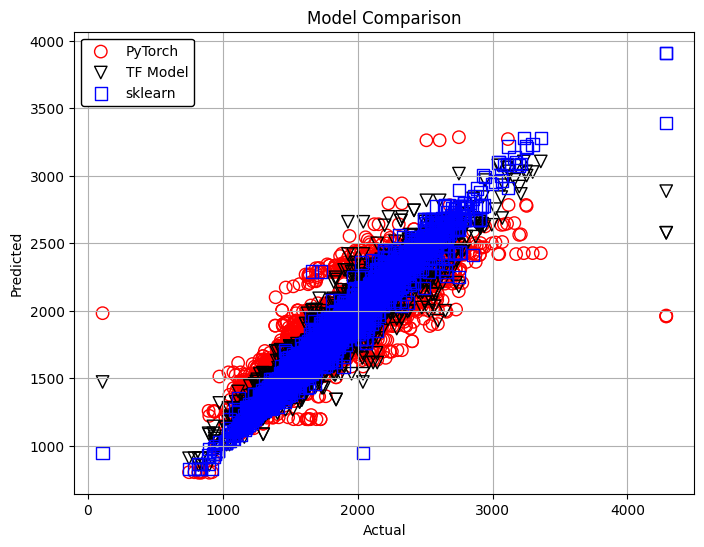

In [10]:
from notebooks.utils import plot_scatter_comparison

plot_scatter_comparison(
    dfs=dataframes,
    labels=["PyTorch", "TF Model", "sklearn"],
    x_col="Actual", y_col="Predicted",
    xlabel="Actual",
    ylabel="Predicted",
    title="Model Comparison",
    # xrange=[0, 5000],
    # yrange=[0, 5000]
)

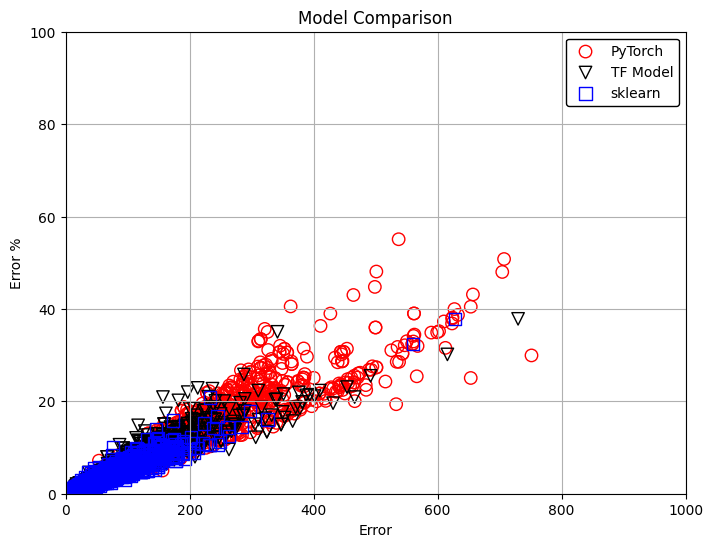

In [11]:
plot_scatter_comparison(
    dfs=dataframes,
    labels=["PyTorch", "TF Model", "sklearn"],
    x_col="Error", y_col="Error %",
    xlabel="Error",
    ylabel="Error %",
    title="Model Comparison",
    xrange=[0, 1000],
    yrange=[0, 100]
)